# PyPI Data Analysis (22nd July)

This notebook looks at the data collected about each project uploaded on PyPI - the names, dates of release, versions, and descriptions - and then narrows it down to the required data, and analyses any trends seen in the data. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Orginal Data

In [2]:
df = pd.read_csv('C:/Users/mihik/.spyder-py3/Diconium Internship/Week 2/' + \
          'week 2 pypi/cleaned_project_and_date')
df = df.drop("Unnamed: 0", axis = 1)
df.head()

,name,old_date,num_versions,all_versions,all_dates,description
0,0,2017-08-06 00:00:00,1,['0.0.0'],[Timestamp('2018-09-11 00:00:00')],0.1
1,0-0,2015-03-04 00:00:00,1,['0.1'],"[Timestamp('2018-09-11 00:00:00'), Timestamp('...",UNKNOWN
2,0-0-1,2017-12-20 00:00:00,1,['0.0.1'],"[Timestamp('2018-09-11 00:00:00'), Timestamp('...",A lib for creating tensorflow tfrecords
3,00print-lol,2018-10-19 00:00:00,2,"['1.1.0', '1.0.0']","[Timestamp('2018-09-11 00:00:00'), Timestamp('...",A simple printer of lists(or nested lists)
4,00smalinux,2015-12-19 00:00:00,1,['1.0'],"[Timestamp('2018-09-11 00:00:00'), Timestamp('...",No project description provided


## Selecting Required Data

In [3]:
useful_df = pd.DataFrame()
useful_df["Project Name"] = df.name
useful_df["Release Date"] = pd.to_datetime(df.old_date)
useful_df = useful_df.sort_values(by = "Release Date")
useful_df = useful_df.reset_index()
useful_df = useful_df.groupby("Release Date").agg({"Project Name": "count"})
useful_df.head()

,Project Name
Release Date,
2002-11-06,1
2002-11-08,1
2002-11-11,9
2002-11-12,2
2002-11-19,2


## Final Data

In [7]:
range_df = pd.DataFrame()
range_df["Release Date"] = pd.Series(pd.date_range(start = "2002-11-05", \
        end = "2019-07-18", freq = "d"))
final = pd.merge(final_df, useful_df, on = "Release Date", how = "left")
final = final.fillna(0)
final["On Day"] = final["Project Name"]
final = final.drop("Project Name", axis = 1)
final = final.set_index("Release Date")
temp = final.cumsum(axis = 0)
final["So Far"] = temp["On Day"]
final.head(10)

,On Day,So Far
Release Date,,
2002-11-05,0.0,0.0
2002-11-06,1.0,1.0
2002-11-07,0.0,1.0
2002-11-08,1.0,2.0
2002-11-09,0.0,2.0
2002-11-10,0.0,2.0
2002-11-11,9.0,11.0
2002-11-12,2.0,13.0
2002-11-13,0.0,13.0


## Trends with number of projects released per day

This graph plots the number of projects released everyday. With a few exceptional days, the general trend is that the number of projects released per day slowly increases with time.

Text(0,0.5,'Number of Projects')

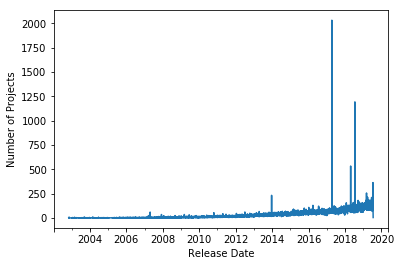

In [9]:
final["On Day"].plot()
plt.ylabel('Number of Projects')

The next two graphs show the number of projects released per day year-wise, for 2017 and 2016. It is hard to see any trends in 2017 due to outliers, but it is a lot more visible in 2016 - there seems to be some sort of seasonality trends.

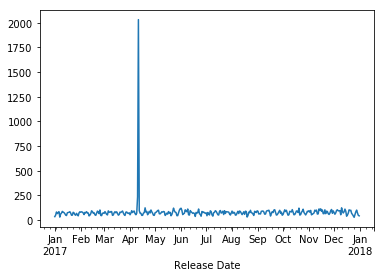

In [10]:
ax = final.loc["2017", "On Day"].plot()
ax.set_label("Number")

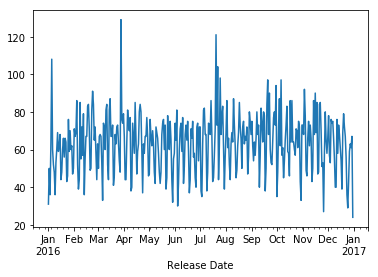

In [11]:
ax = final.loc["2016", "On Day"].plot()
ax.set_label("Number")

The next two graphs take 2 randomly chosen months and tries to analyse the seasonality seen above. It's clear that there is a similar trend each week - the number of projects released over the weekends is low, but during the weekdays is high.

Text(0,0.5,'Number')

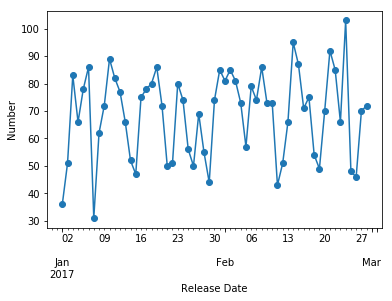

In [12]:
ax = final.loc["2017-01":"2017-02", "On Day"].plot(marker = 'o', linestyle = '-')
ax.set_ylabel("Number")

Text(0,0.5,'Number')

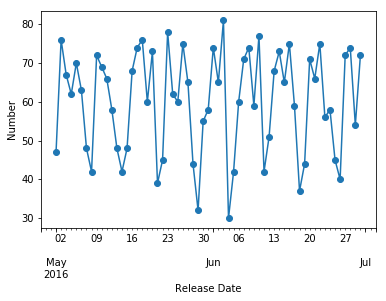

In [13]:
ax = final.loc["2016-05":"2016-06", "On Day"].plot(marker = 'o', linestyle = '-')
ax.set_ylabel("Number")

The next two box plots show the mean number of projects released per day, grouped by the day of the week. The first box plot is with outliers, the second without. It confirms that the number of projects released over the weekends is the least.

Text(0.5,1,'On Day')

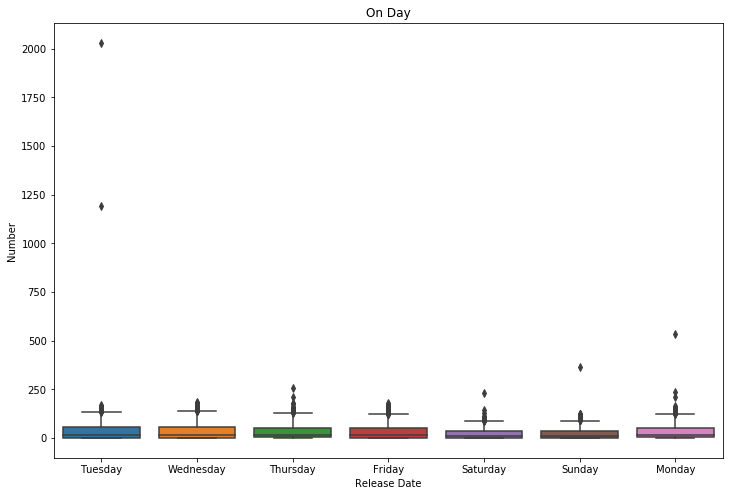

In [14]:
fig, axes = plt.subplots(figsize = (12, 8), sharex = True)
for name, ax in zip(["On Day"], [axes]):
    sns.boxplot(data = final, x = final.index.weekday_name, y = name, ax = ax)
ax.set_ylabel("Number")
ax.set_title(name)

Text(0.5,1,'On Day')

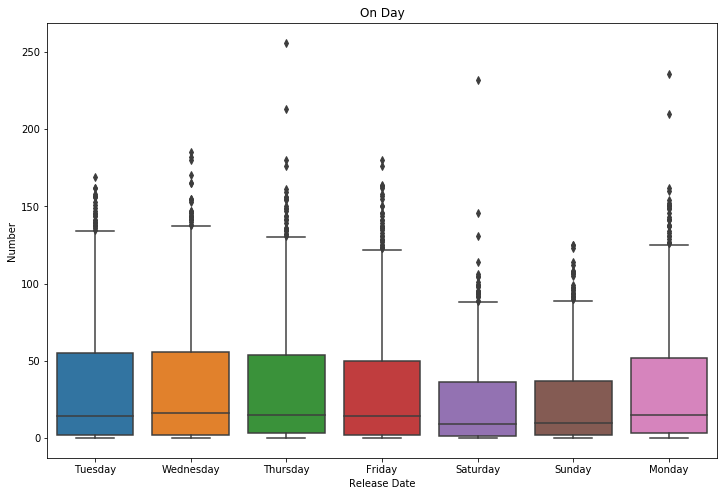

In [15]:
temp_df = final[final["On Day"] < 350]
fig, axes = plt.subplots(figsize = (12, 8), sharex = True)
for name, ax in zip(["On Day"], [axes]):
    sns.boxplot(data = temp_df, x = temp_df.index.weekday_name, y = name, ax = ax)
ax.set_ylabel("Number")
ax.set_title(name)

The next two box plots show the mean number of projects released per day, grouped by the month of the year. The first box plot is with outliers, the second without. There does not seem to be a specific trend here.

Text(0.5,1,'On Day')

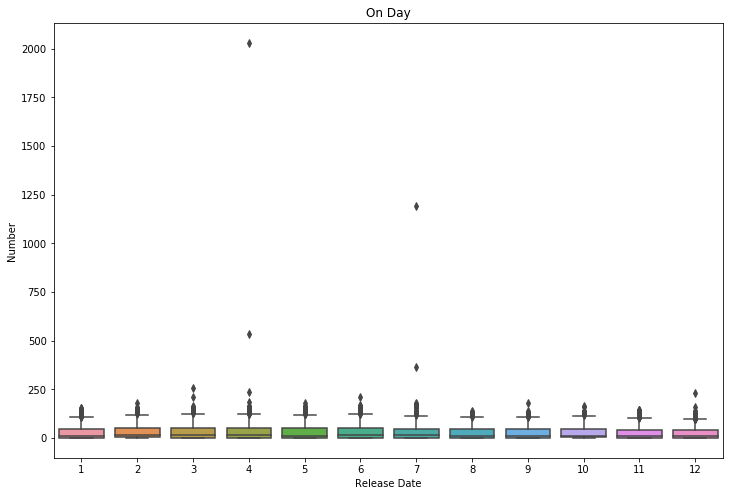

In [16]:
fig, axes = plt.subplots(figsize = (12, 8), sharex = True)
for name, ax in zip(["On Day"], [axes]):
    sns.boxplot(data = final, x = final.index.month, y = name, ax = ax)
ax.set_ylabel("Number")
ax.set_title(name)

Text(0.5,1,'On Day')

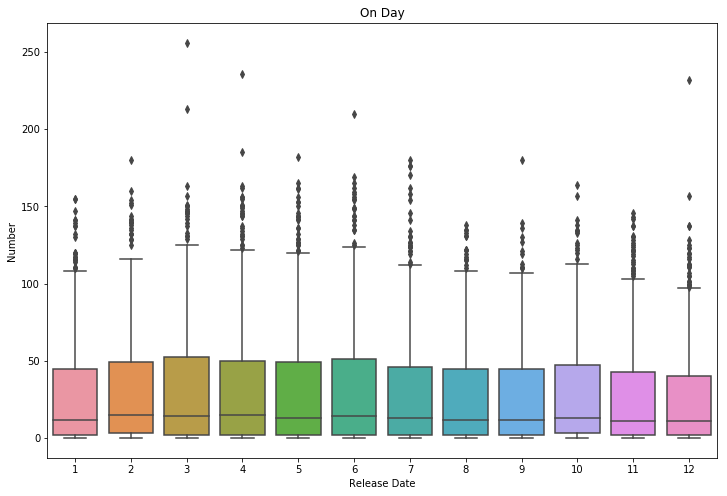

In [17]:
temp_df = final[final["On Day"] < 350]
fig, axes = plt.subplots(figsize = (12, 8), sharex = True)
for name, ax in zip(["On Day"], [axes]):
    sns.boxplot(data = temp_df, x = temp_df.index.month, y = name, ax = ax)
ax.set_ylabel("Number")
ax.set_title(name)

## Trends with total number of projects released

This graph shows the relationship beteween the release date and the total number of projects released so far. The graph is polynomic/exponential in nature.

Text(0,0.5,'Number of projects')

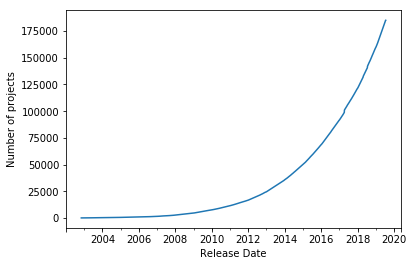

In [18]:
final["So Far"].plot()
plt.ylabel("Number of projects")

## Release in 2019

The next two graphs show the trend of total number of projects released, and the number of projects released per day, with the release date. 

Text(0,0.5,'Number')

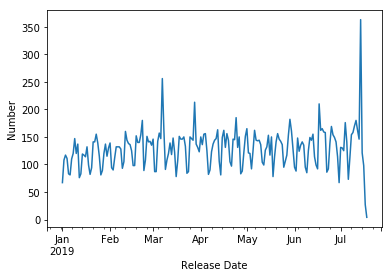

In [20]:
ax = final.loc["2019", "On Day"].plot()
ax.set_ylabel("Number")

Text(0,0.5,'Number')

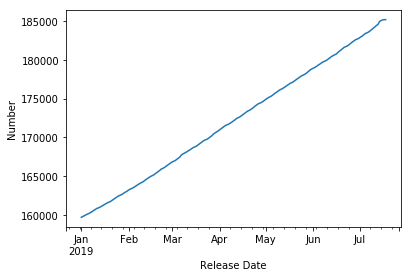

In [21]:
ax = final.loc["2019", "So Far"].plot()
ax.set_ylabel("Number")